In [35]:
#Bonus Analysis
#import dependencies
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
#adds variable from environments - need to pip install python-dotenv
load_dotenv()
#create connection to SQL database using .env file for security
database_url = os.environ.get("DATABASE_URL")
engine = create_engine(database_url)
connection = engine.connect()

Text(0.5, 1.0, 'Frequency of Salaries')

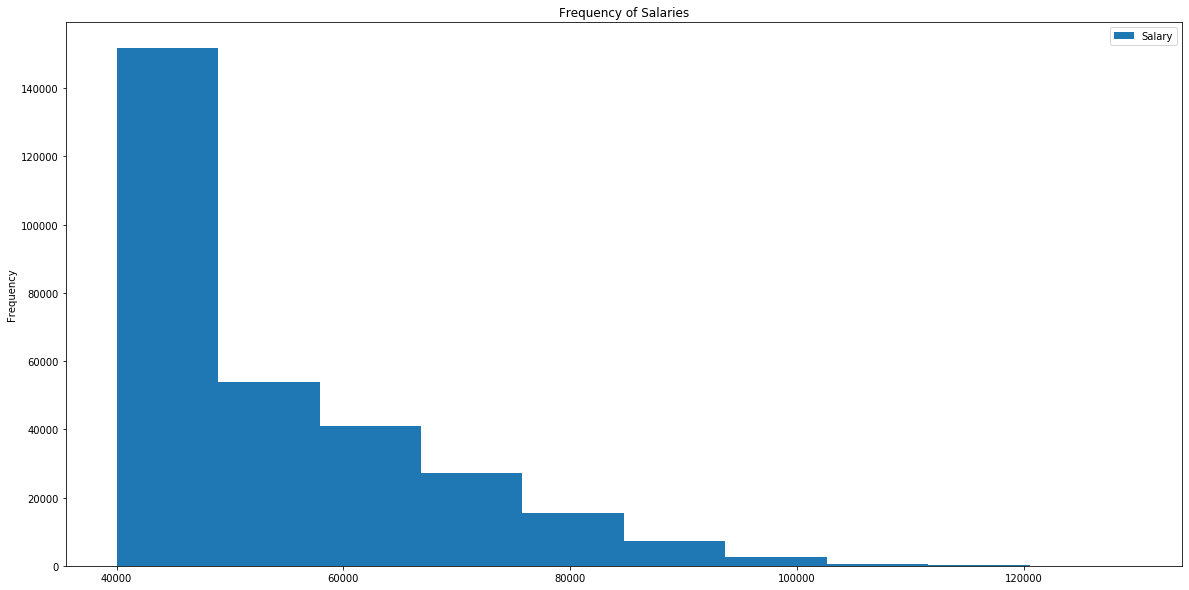

In [68]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Salary_df = pd.read_sql("SELECT * FROM salaries", connection)
Salary_df= Salary_df.set_index('emp_no')
Salary_df = Salary_df.rename(columns={"salary":"Salary"})
Salary_df.plot(kind ='hist',figsize = (20,10))
plt.title("Frequency of Salaries")

In [69]:
Salary_df['Salary'].value_counts()

40000.0     95346
55581.0        19
53078.0        18
53738.0        18
44564.0        17
            ...  
82390.0         1
82387.0         1
113236.0        1
82384.0         1
80755.0         1
Name: Salary, Length: 50355, dtype: int64

In [70]:
AverageSalary_df = pd.read_sql('''SELECT e.emp_no,e.last_name,e.first_name,s.salary,t.title
FROM employees as e
JOIN salaries as s
ON e.emp_no = s.emp_no
JOIN titles as t
ON e.emp_title_id = t.title_id;''' , connection)
AverageSalary_df = AverageSalary_df.rename(columns = {"title":"Title"})
AverageSalary_df.head()




,emp_no,last_name,first_name,salary,Title
0,13616,Lorho,Perry,40000.0,Senior Engineer
1,240129,Karnin,Roddy,43548.0,Technique Leader
2,43471,Gihr,Mechthild,40023.0,Engineer
3,444985,Verspoor,Giap,71042.0,Staff
4,492723,Sanella,Piyawadee,46740.0,Senior Engineer


Text(0, 0.5, 'Salary')

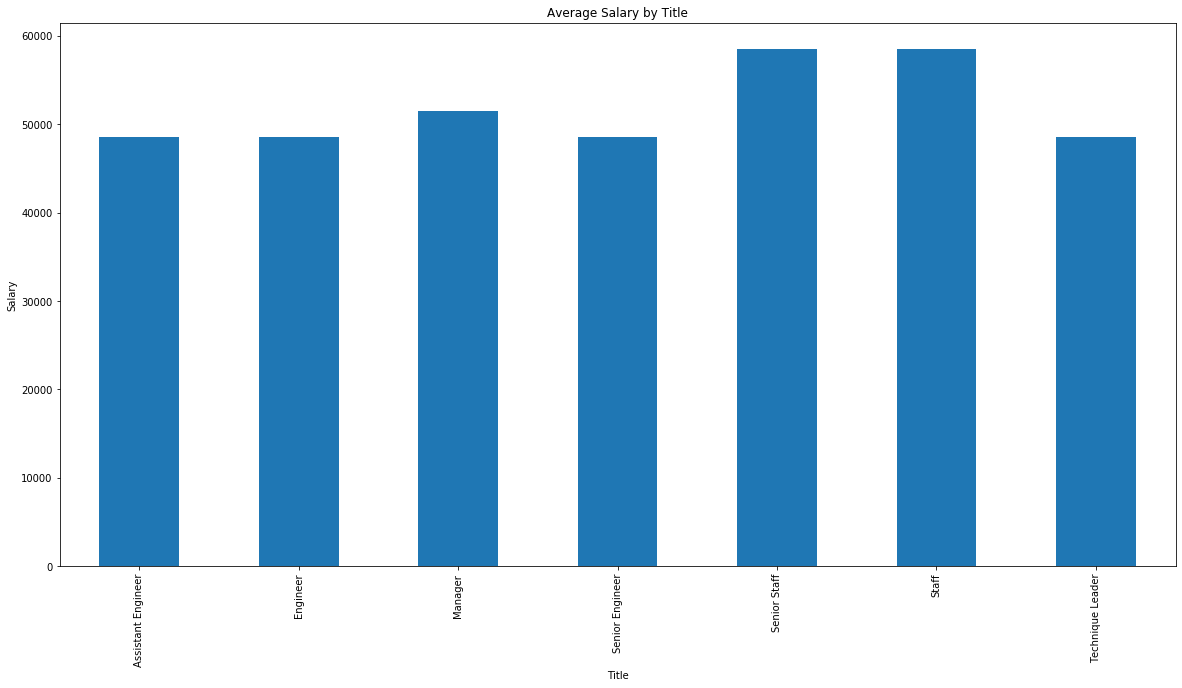

In [72]:
AverageSalary_gb= AverageSalary_df.groupby(["Title"])
AverageSalaryByTitle_df = AverageSalary_gb['salary'].mean()
AverageSalaryByTitle_df.plot(kind = 'bar', figsize = (20,10))
plt.title("Average Salary by Title")
plt.ylabel("Salary")